In [45]:
%pip install matplotlib
%pip install seaborn

#Importing libraries
import nltk, re, pprint
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pprint, time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [46]:
# reading the Treebank tagged sentences
nltk.download('treebank')
wsj = list(nltk.corpus.treebank.tagged_sents())

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\PRATIMA\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!


In [47]:
# first few tagged sentences
print(wsj[:5])

[[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')], [('Mr.', 'NNP'), ('Vinken', 'NNP'), ('is', 'VBZ'), ('chairman', 'NN'), ('of', 'IN'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'DT'), ('Dutch', 'NNP'), ('publishing', 'VBG'), ('group', 'NN'), ('.', '.')], [('Rudolph', 'NNP'), ('Agnew', 'NNP'), (',', ','), ('55', 'CD'), ('years', 'NNS'), ('old', 'JJ'), ('and', 'CC'), ('former', 'JJ'), ('chairman', 'NN'), ('of', 'IN'), ('Consolidated', 'NNP'), ('Gold', 'NNP'), ('Fields', 'NNP'), ('PLC', 'NNP'), (',', ','), ('was', 'VBD'), ('named', 'VBN'), ('*-1', '-NONE-'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('of', 'IN'), ('this', 'DT'), ('British', 'JJ'), ('industrial', 'JJ'), ('conglomerate', 'NN'), ('.', '.')], [('A', 'DT'), ('f

In [48]:
# Splitting into train and test
random.seed(1234)
train_set, test_set = train_test_split(wsj,test_size=0.2)

print(len(train_set))
print(len(test_set))
print(train_set[:5])

3131
783
[[('The', 'DT'), ('company', 'NN'), ('recently', 'RB'), ('said', 'VBD'), ('0', '-NONE-'), ('it', 'PRP'), ('would', 'MD'), ('sell', 'VB'), ('some', 'DT'), ('operations', 'NNS'), ('and', 'CC'), ('lay', 'VBD'), ('off', 'RP'), ('4', 'CD'), ('%', 'NN'), ('of', 'IN'), ('its', 'PRP$'), ('work', 'NN'), ('force', 'NN'), (',', ','), ('altogether', 'RB'), ('*-1', '-NONE-'), ('reducing', 'VBG'), ('employment', 'NN'), ('to', 'TO'), ('less', 'RBR'), ('than', 'IN'), ('16,000', 'CD'), ('from', 'IN'), ('about', 'IN'), ('18,000', 'CD'), ('.', '.')], [('A', 'DT'), ('White', 'NNP'), ('House', 'NNP'), ('spokesman', 'NN'), ('condemned', 'VBD'), ('the', 'DT'), ('truce', 'NN'), ('suspension', 'NN'), ('as', 'IN'), ('``', '``'), ('deplorable', 'JJ'), ("''", "''"), ('but', 'CC'), ('brushed', 'VBD'), ('off', 'RP'), ('talk', 'NN'), ('of', 'IN'), ('*', '-NONE-'), ('renewing', 'VBG'), ('military', 'JJ'), ('funding', 'NN'), ('for', 'IN'), ('the', 'DT'), ('insurgents', 'NNS'), ('.', '.')], [('Another', 'DT'),

In [49]:
# Getting list of tagged words
train_tagged_words = [tup for sent in train_set for tup in sent]
len(train_tagged_words)

80177

In [63]:
# tokens 
tokens = [pair[0] for pair in train_tagged_words]
tokens[:10]

['The',
 'company',
 'recently',
 'said',
 '0',
 'it',
 'would',
 'sell',
 'some',
 'operations']

In [64]:
# vocabulary
V = set(tokens)
print(len(V))

10968


In [65]:
# number of tags
T = set([pair[1] for pair in train_tagged_words])
len(T)

46

In [66]:
print(T)

{'IN', 'JJS', '#', 'FW', 'RBS', 'SYM', 'EX', 'JJR', 'WRB', 'PDT', 'WDT', 'VBZ', 'NNPS', 'NNS', 'RP', 'TO', '.', "''", '-RRB-', 'VBP', 'VBN', '-LRB-', 'PRP$', ',', 'NNP', '``', 'RBR', 'PRP', 'WP', 'VB', 'UH', 'POS', 'LS', 'CD', 'MD', ':', 'VBD', '-NONE-', 'JJ', '$', 'WP$', 'VBG', 'RB', 'CC', 'NN', 'DT'}


In [67]:
# computing the Emission Probability P(w/t) and storing in T x V matrix
t = len(T)
v = len(V)
w_given_t = np.zeros((t, v))

In [68]:
# compute word given tag: Emission Probability
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(w_given_tag_list)
    
    return (count_w_given_tag, count_tag)

In [69]:
# compute tag given tag: tag2(t2) given tag1 (t1), i.e. Transition Probability
def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

In [70]:
# creating t x t transition matrix of tags
# each column is t2, each row is t1
# thus M(i, j) represents P(tj given ti)

tags_matrix = np.zeros((len(T), len(T)), dtype='float32')
for i, t1 in enumerate(list(T)):
    for j, t2 in enumerate(list(T)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

In [71]:
tags_matrix

array([[1.6292496e-02, 4.1051959e-03, 6.4143684e-04, ..., 7.6972420e-04,
        1.1148172e-01, 3.1648493e-01],
       [1.6546762e-01, 0.0000000e+00, 0.0000000e+00, ..., 7.1942448e-03,
        2.8776979e-01, 1.4388490e-02],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [5.2309405e-02, 2.2259322e-03, 0.0000000e+00, ..., 5.5648305e-04,
        1.2075682e-01, 1.0628826e-01],
       [2.4264987e-01, 1.9091256e-04, 0.0000000e+00, ..., 3.8850706e-02,
        1.2399771e-01, 5.5364645e-03],
       [9.8979278e-03, 9.4339624e-03, 0.0000000e+00, ..., 3.0931024e-04,
        4.6922362e-01, 1.0825859e-03]], dtype=float32)

In [72]:
# convert the matrix to a df for better readability
tags_df = pd.DataFrame(tags_matrix, columns = list(T), index=list(T))

In [73]:
tags_df

,IN,JJS,#,FW,RBS,SYM,EX,JJR,WRB,PDT,...,VBD,-NONE-,JJ,$,WP$,VBG,RB,CC,NN,DT
IN,0.016292,0.004105,0.000641,0.000000,0.000000,0.000000,0.001283,0.006286,0.001283,0.000898,...,0.000513,0.034253,0.095446,0.027582,0.000128,0.003079,0.010520,0.000770,0.111482,0.316485
JJS,0.165468,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007194,0.014388,0.115108,0.007194,0.000000,0.021583,0.043165,0.007194,0.287770,0.014388
#,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FW,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000
RBS,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.692308,0.000000,0.000000,0.000000,0.192308,0.000000,0.000000,0.000000
SYM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
EX,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.147059,0.000000,0.000000,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000
JJR,0.337539,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003155,0.018927,0.072555,0.003155,0.000000,0.003155,0.003155,0.028391,0.211356,0.018927
WRB,0.021127,0.000000,0.000000,0.000000,0.007042,0.000000,0.007042,0.000000,0.000000,0.007042,...,0.014085,0.056338,0.098592,0.000000,0.000000,0.007042,0.028169,0.000000,0.063380,0.309859
PDT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.904762


In [74]:
tags_df.loc['.', :]

IN        0.115769
JJS       0.001290
#         0.000000
FW        0.000000
RBS       0.000645
SYM       0.000000
EX        0.003225
JJR       0.002580
WRB       0.006127
PDT       0.000645
WDT       0.000645
VBZ       0.002580
NNPS      0.002580
NNS       0.044824
RP        0.000000
TO        0.000967
.         0.000000
''        0.060626
-RRB-     0.004515
VBP       0.000000
VBN       0.002257
-LRB-     0.004515
PRP$      0.006772
,         0.000000
NNP       0.185102
``        0.065140
RBR       0.000000
PRP       0.057723
WP        0.003870
VB        0.000645
UH        0.000322
POS       0.000000
LS        0.000967
CD        0.008384
MD        0.000000
:         0.003870
VBD       0.000645
-NONE-    0.020961
JJ        0.034505
$         0.001290
WP$       0.000000
VBG       0.004192
RB        0.043857
CC        0.045792
NN        0.045469
DT        0.216382
Name: ., dtype: float32

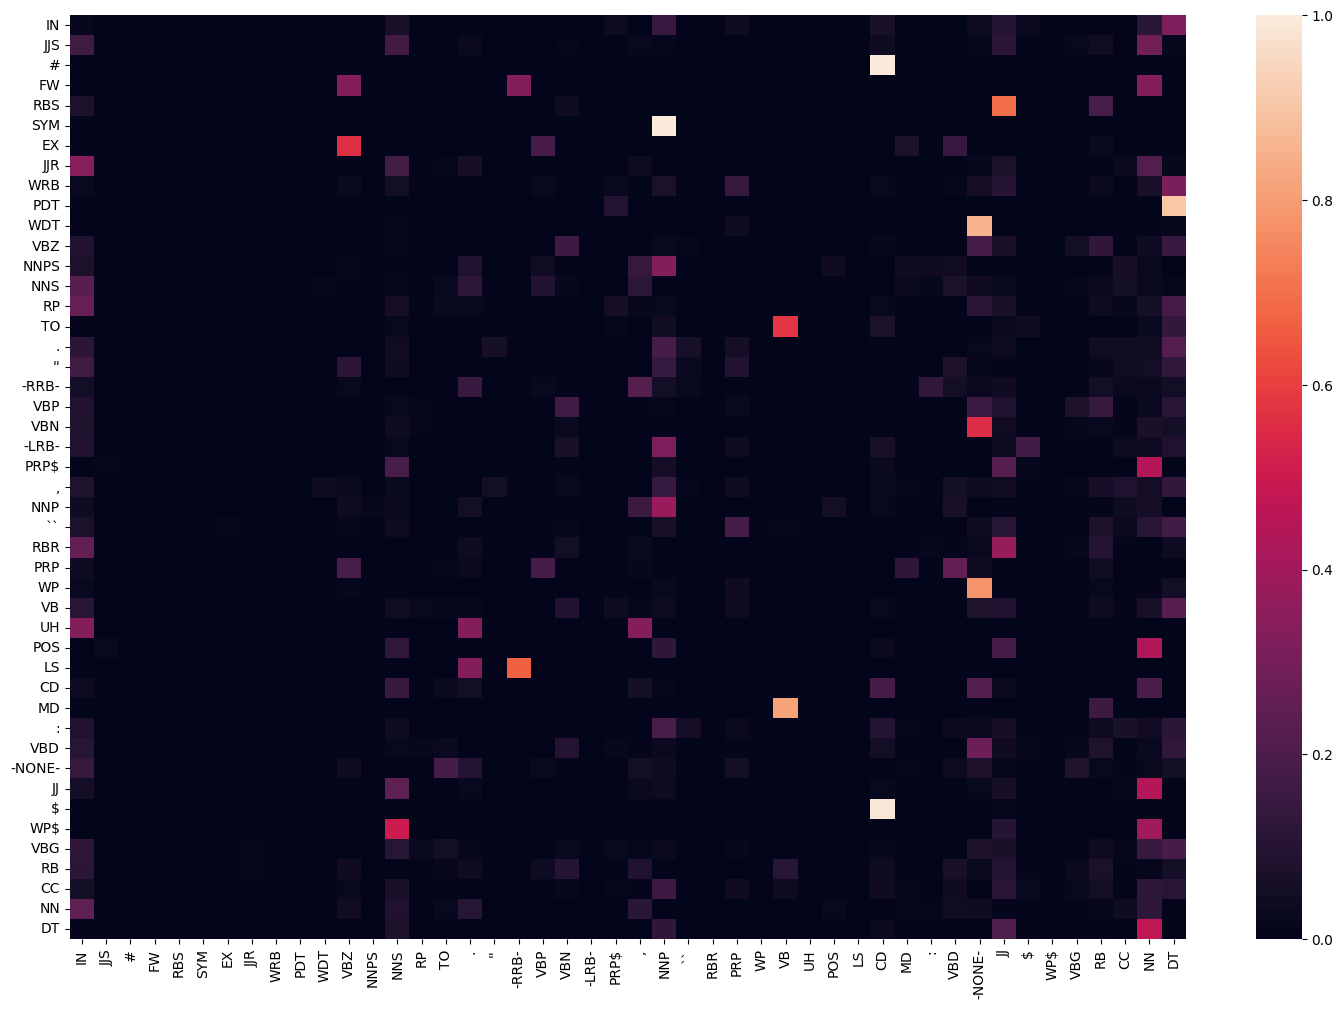

In [75]:
# heatmap of tags matrix
# T(i, j) means P(tag j given tag i)
plt.figure(figsize=(18, 12))
sns.heatmap(tags_df)
plt.show()

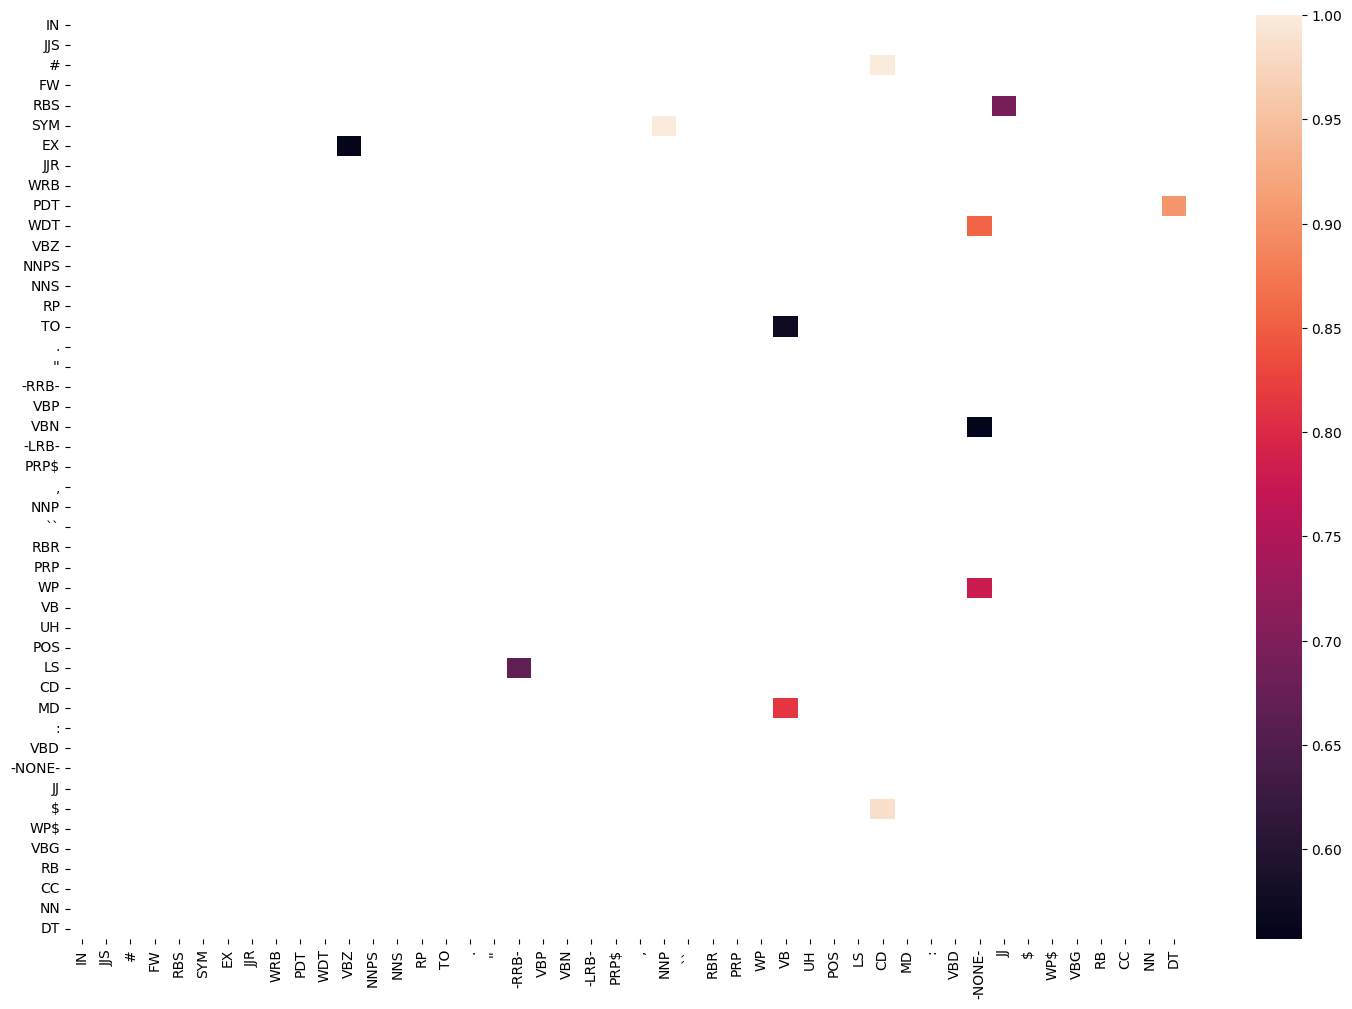

In [76]:
# frequent tags
# filter the df to get P(t2, t1) > 0.5
tags_frequent = tags_df[tags_df>0.5]
plt.figure(figsize=(18, 12))
sns.heatmap(tags_frequent)
plt.show()

In [77]:
# Viterbi Algorithm
len(train_tagged_words)

80177

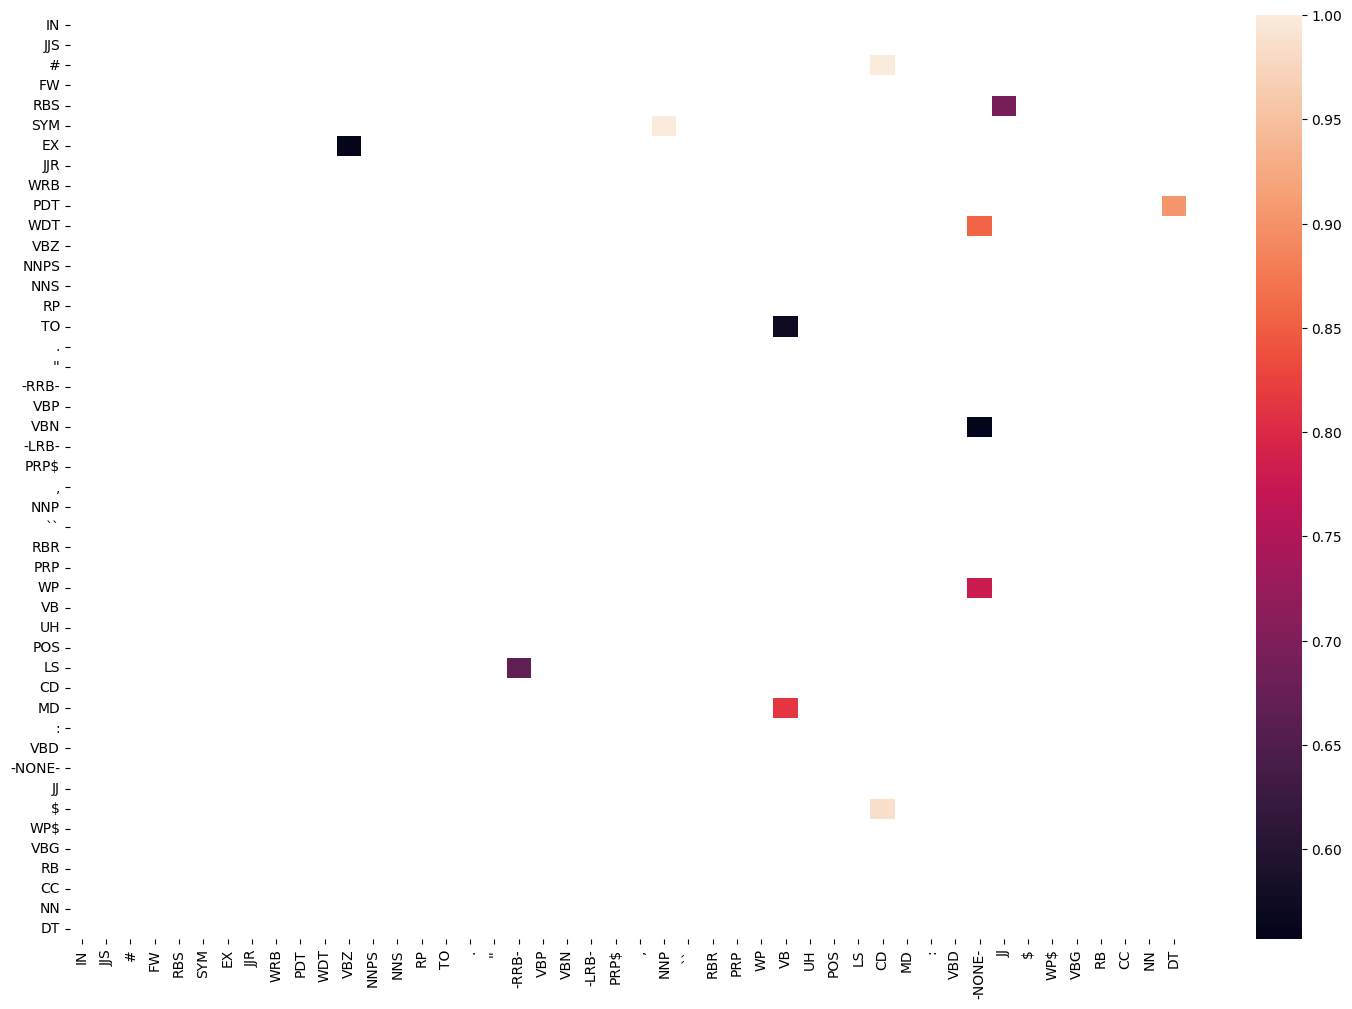

In [78]:
# frequent tags
# filter the df to get P(t2, t1) > 0.5
tags_frequent = tags_df[tags_df>0.5]
plt.figure(figsize=(18, 12))
sns.heatmap(tags_frequent)
plt.show()

In [79]:
len(train_tagged_words)

80177

In [80]:
# Viterbi Heuristic
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

In [81]:
# Running the Viterbi algorithm on a few sample sentences
# since running it on the entire data set will take many hours

random.seed(1234)

# choose random 5 sents
rndom = [random.randint(1,len(test_set)) for x in range(5)]

# list of sents
test_run = [test_set[i] for i in rndom]

# list of tagged words
test_run_base = [tup for sent in test_run for tup in sent]

# list of untagged words
test_tagged_words = [tup[0] for sent in test_run for tup in sent]
test_run

[[('First', 'NNP'),
  ('of', 'IN'),
  ('America', 'NNP'),
  ('said', 'VBD'),
  ('0', '-NONE-'),
  ('some', 'DT'),
  ('of', 'IN'),
  ('the', 'DT'),
  ('managers', 'NNS'),
  ('will', 'MD'),
  ('take', 'VB'),
  ('other', 'JJ'),
  ('jobs', 'NNS'),
  ('with', 'IN'),
  ('First', 'NNP'),
  ('of', 'IN'),
  ('America', 'NNP'),
  ('.', '.')],
 [('In', 'IN'),
  ('his', 'PRP$'),
  ('lawsuit', 'NN'),
  (',', ','),
  ('Mr.', 'NNP'),
  ('Trudeau', 'NNP'),
  ('says', 'VBZ'),
  ('0', '-NONE-'),
  ('the', 'DT'),
  ('strike', 'NN'),
  ('illegally', 'RB'),
  ('included', 'VBD'),
  ('Darkhorse', 'NNP'),
  (',', ','),
  ('and', 'CC'),
  ('the', 'DT'),
  ('cartoonist', 'NN'),
  ('refused', 'VBD'),
  ('*-1', '-NONE-'),
  ('to', 'TO'),
  ('honor', 'VB'),
  ('the', 'DT'),
  ('strike', 'NN'),
  ('against', 'IN'),
  ('the', 'DT'),
  ('company', 'NN'),
  ('.', '.')],
 [('Market', 'NN'),
  ('sources', 'NNS'),
  ('said', 'VBD'),
  ('0', '-NONE-'),
  ('Reliance', 'NNP'),
  ('has', 'VBZ'),
  ('already', 'RB'),
  ('sol

In [82]:
# tagging the test sentences
start = time.time()
tagged_seq = Viterbi(test_tagged_words)
end = time.time()
difference = end-start

In [83]:
print("Time taken in seconds: ", difference)
print(tagged_seq)
#print(test_run_base)

Time taken in seconds:  43.01822280883789
[('First', 'NNP'), ('of', 'IN'), ('America', 'NNP'), ('said', 'VBD'), ('0', '-NONE-'), ('some', 'DT'), ('of', 'IN'), ('the', 'DT'), ('managers', 'NNS'), ('will', 'MD'), ('take', 'VB'), ('other', 'JJ'), ('jobs', 'NNS'), ('with', 'IN'), ('First', 'NNP'), ('of', 'IN'), ('America', 'NNP'), ('.', '.'), ('In', 'IN'), ('his', 'PRP$'), ('lawsuit', 'NN'), (',', ','), ('Mr.', 'NNP'), ('Trudeau', 'NNP'), ('says', 'VBZ'), ('0', '-NONE-'), ('the', 'DT'), ('strike', 'NN'), ('illegally', 'RB'), ('included', 'VBD'), ('Darkhorse', 'NNP'), (',', ','), ('and', 'CC'), ('the', 'DT'), ('cartoonist', 'IN'), ('refused', 'VBN'), ('*-1', '-NONE-'), ('to', 'TO'), ('honor', 'VB'), ('the', 'DT'), ('strike', 'NN'), ('against', 'IN'), ('the', 'DT'), ('company', 'NN'), ('.', '.'), ('Market', 'NNP'), ('sources', 'NNS'), ('said', 'VBD'), ('0', '-NONE-'), ('Reliance', 'NNP'), ('has', 'VBZ'), ('already', 'RB'), ('sold', 'VBN'), ('its', 'PRP$'), ('entire', 'JJ'), ('UAL', 'NNP'), (

In [84]:
# accuracy
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 

In [85]:
accuracy = len(check)/len(tagged_seq)

In [86]:
accuracy

0.9008264462809917

In [87]:
incorrect_tagged_cases = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq, test_run_base)) if j[0]!=j[1]]
incorrect_tagged_cases

[[('the', 'DT'), (('cartoonist', 'IN'), ('cartoonist', 'NN'))],
 [('cartoonist', 'NN'), (('refused', 'VBN'), ('refused', 'VBD'))],
 [('.', '.'), (('Market', 'NNP'), ('Market', 'NN'))],
 [("n't", 'RB'), (('have', 'VBP'), ('have', 'VB'))],
 [('the', 'DT'), (('future', 'JJ'), ('future', 'NN'))],
 [('.', '.'), (('Much', 'RB'), ('Much', 'JJ'))],
 [('``', '``'), (('migrate', 'IN'), ('migrate', 'VB'))],
 [("''", "''"), (('predicts', 'IN'), ('predicts', 'VBZ'))],
 [('Jack', 'NNP'), (('Lawless', 'IN'), ('Lawless', 'NNP'))],
 [('of', 'IN'), (('US', 'IN'), ('US', 'NNP'))],
 [('US', 'NNP'), (('Sprint', 'IN'), ('Sprint', 'NNP'))],
 [('Sprint', 'NNP'), (("'s", 'VBZ'), ("'s", 'POS'))]]

In [92]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PRATIMA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [93]:
## Testing
sentence_test = 'Twitter is the best networking social site. Man is a social animal. Data science is an emerging field. Data science jobs are high in demand.'
words = word_tokenize(sentence_test)

start = time.time()
tagged_seq = Viterbi(words)
end = time.time()
difference = end-start

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\PRATIMA/nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2032.0_x64__qbz5n2kfra8p0\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2032.0_x64__qbz5n2kfra8p0\\share\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2032.0_x64__qbz5n2kfra8p0\\lib\\nltk_data'
    - 'C:\\Users\\PRATIMA\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
